10000
50


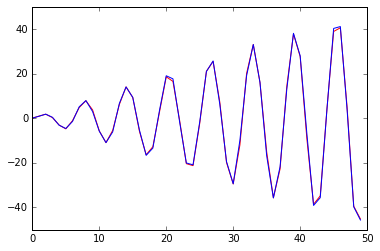

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
#choose "cpu" or "gpu"
os.environ['THEANO FLAGS']= 'device=gpu'

#following line is useful for fast compilation while using Gpu
os.environ['THEANO FLAGS']= 'optimizer=fast_compile'

from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 1
timesteps = 50
nb_classes = 2


model = Sequential()
model.add(LSTM(4, return_sequences=False,
               input_shape=(timesteps, data_dim)))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# generate dummy training data
x_train = np.zeros((10000,timesteps, data_dim))
y_train = np.zeros((10000, nb_classes))
count = 0
classes = np.zeros(1000)
times = np.zeros(50)
for i in range(0, 50):
    times[i]=i

while count<5000:
    newCount = 0
    while newCount<50:
        x_train[count][newCount] = newCount*np.sin(newCount+np.random.uniform(0,.1))+np.random.uniform(0,.1)
        newCount+=1
    y_train[count][0]=1
    y_train[count][1]=0
    count+=1
    
while count<10000:
    newCount = 0
    while newCount<50:
        x_train[count][newCount] = (1./(newCount+1))*np.sin(newCount+np.random.uniform(0,.1))+np.random.uniform(0,.1)
        newCount+=1
    y_train[count][0]=0
    y_train[count][1]=1
    count+=1


# generate dummy validation data

x_val = np.zeros((1000,timesteps, data_dim))
y_val = np.zeros((1000, nb_classes))
count = 0

while count<500:
    newCount = 0
    while newCount<50:
        x_val[count][newCount] = newCount*np.sin(newCount+np.random.uniform(0,.1))+np.random.uniform(0,.1)
        newCount+=1
    classes[count]=0
    y_val[count][0]=1
    y_val[count][1]=0
    count+=1

while count<1000:
    newCount = 0
    while newCount<50:
        x_val[count][newCount] = (1./(newCount+1))*np.sin(newCount+np.random.uniform(0,.1))+np.random.uniform(0,.1)
        newCount+=1
    classes[count]=1
    y_val[count][0]=0
    y_val[count][1]=1
    count+=1

#model.fit(x_train, y_train,batch_size=64, nb_epoch=2,validation_data=(x_val, y_val), shuffle= True)
#classesTrain = model.predict_classes(x_val, batch_size=32)
#correct= 0
print len(x_train)
for i in range(0,1000):
    if(classes[i]==classesTrain[i]):
        correct= correct+1
print len(x_train[0,:])

plt.plot(times, x_train[0,:], "r")
plt.plot(times, x_train[501,:], "b")

In [1]:
#x = np.linspace(1,100, 1000)
#y= (1/x)*np.sin(x)
#y2= (x)*np.sin(x)
#plt.plot(x, y)
#plt.plot(x, y2)